## Importing necessary Libraries

In [36]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import folium # plotting library
import matplotlib.pyplot as plt # for the elbow method
import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors # Matplotlib and associated plotting modules
import seaborn as sns # for the elbow method
print('Libraries imported.')

Libraries imported.


In [37]:
df = pd.read_csv('Clobal Weather Condition - Sheet1.csv')

## Data Preprocessing

In [38]:
#Checking rows, colums and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
Country                                      107 non-null object
City                                         107 non-null object
Latitude                                     107 non-null float64
Longitude                                    107 non-null float64
Average Temperature (C)                      107 non-null float64
Average High Temperature (C)                 107 non-null float64
Average Low Temperature (C)                  107 non-null float64
Average Precipitation (mm)                   107 non-null float64
Average Number of Days With Precipitation    106 non-null float64
Average Length of Day (h)                    107 non-null float64
Average Number of Days Above 30-32C          105 non-null float64
Average Number of Days Below 32F/0C          104 non-null float64
Average Relative Humidity(%)                 106 non-null float64
Average Wind Speed (km/h)              

In [39]:
## We see we got a problem with some column values, since we expect 107 entries for each column. Let's check for NaN values
df.isnull().values.sum()

8

In [40]:
## We got 8 NaN values. We will replace the NaN values with the average of columns
my_data = df.fillna(df.mean())

In [41]:
## Checking again for NaN Values
my_data.isnull().values.sum()

0

In [42]:
## Take a look at our dataset
my_data.head()

,Country,City,Latitude,Longitude,Average Temperature (C),Average High Temperature (C),Average Low Temperature (C),Average Precipitation (mm),Average Number of Days With Precipitation,Average Length of Day (h),Average Number of Days Above 30-32C,Average Number of Days Below 32F/0C,Average Relative Humidity(%),Average Wind Speed (km/h)
0,Argentina,Buenos Aires,-34.603722,-58.381592,17.7,22.5,13.5,970.0,101.0,12.5,21.0,14.0,72.0,10.4
1,Australia,CANBERRA,-35.343784,149.082977,12.0,19.0,6.0,620.0,100.0,12.6,16.0,64.0,67.5,17.0
2,Australia,SYDNEY,-33.865143,151.209900,17.0,22.0,12.0,1130.0,130.0,12.6,12.0,0.0,69.5,17.0
3,Australia,MELBOURNE,-37.808163,144.957830,14.0,19.0,9.0,560.0,156.0,12.6,19.0,2.0,71.0,22.0
4,Austria,Vienna,48.210033,16.363449,11.4,15.3,8.3,547.9,43.4,12.8,3.0,50.4,72.0,14.0


## Creating a world map with ideal zoom

In [43]:
map1 = folium.Map(location=[0, 0], zoom_start = 2)

In [44]:
map1

## Inserting 108 cities with dots on the map

In [45]:
for lat, lng, country, city in zip(my_data['Latitude'], my_data['Longitude'],  my_data['Country'], my_data['City']):
    label = '{}, {}'.format(city, country)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map1)  
    
map1

In [46]:
## Getting the values from climate columns
X = my_data.iloc[:, 4:].values

In [47]:
## Normalizing my data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_norm = sc_X.fit_transform(X)

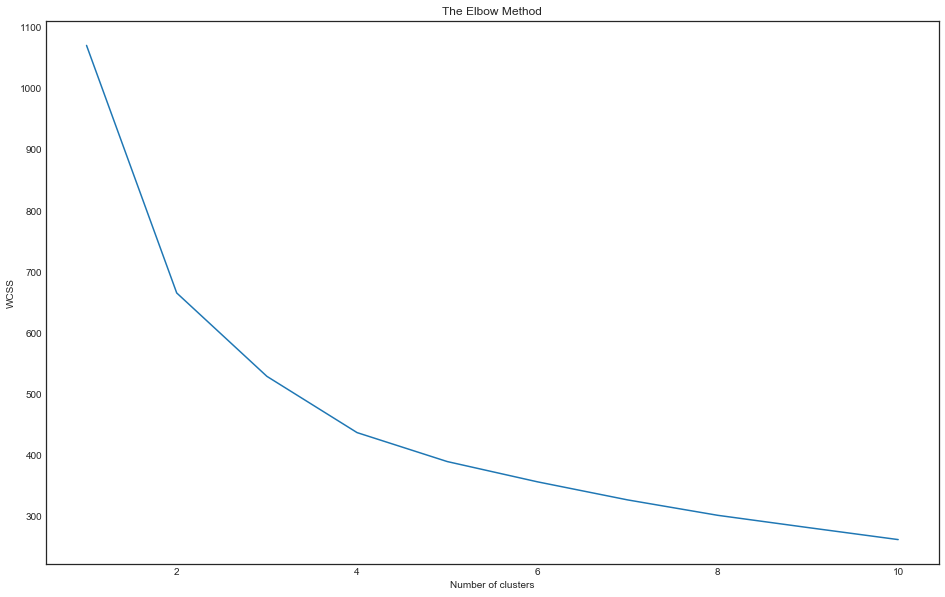

In [48]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.set_style("white")
plt.show()

In [49]:
type(X_norm)

numpy.ndarray

In [50]:
df_weather = pd.DataFrame(data = X_norm)

In [51]:
df_weather

,0,1,2,3,4,5,6,7,8,9
0,0.419103,0.469862,0.439481,0.406275,-0.459609,-1.004453,-0.332880,-0.667158,2.721196e-02,-0.837088
1,-0.395464,-0.010912,-0.641707,-0.318598,-0.475418,-0.565773,-0.397734,0.214922,-4.589343e-01,0.514150
2,0.319069,0.401180,0.223244,0.737646,-0.001148,-0.565773,-0.449618,-0.914140,-2.428693e-01,0.514150
3,-0.109651,-0.010912,-0.209232,-0.442861,0.409886,-0.565773,-0.358822,-0.878857,-8.082055e-02,1.537816
4,-0.481208,-0.519159,-0.310143,-0.467921,-1.370208,0.311585,-0.566355,-0.025004,2.721196e-02,-0.100049
5,-0.252557,-0.093331,0.136748,-1.107673,1.563943,-0.127094,0.000000,0.000000,4.605703e-15,0.000000
6,1.605228,1.362728,1.808987,-1.457683,-1.898228,-0.565773,1.612741,-0.914140,-8.910644e-01,1.128350
7,-1.324356,-1.384552,-1.218341,-0.157054,1.026437,1.188944,-0.605267,1.626250,6.754070e-01,-0.837088
8,-0.681277,-0.835096,-0.641707,0.074905,1.405853,0.750265,-0.605267,-0.032060,9.778981e-01,0.514150
9,1.347996,1.376464,1.419759,0.654803,0.077897,-1.004453,1.067967,-0.914140,4.161290e-01,-0.509515


In [66]:
## Choosing number of clusters: 5
kclusters = 5
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_weather)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:107] 

array([3, 3, 3, 3, 3, 1, 0, 4, 1, 2, 3, 1, 1, 4, 3, 1, 2, 1, 3, 0, 3, 4,
       4, 0, 4, 3, 4, 1, 3, 3, 1, 1, 1, 3, 3, 4, 1, 4, 2, 0, 0, 0, 1, 3,
       3, 1, 0, 3, 3, 3, 1, 3, 0, 4, 1, 4, 1, 2, 3, 0, 1, 3, 1, 3, 1, 4,
       3, 2, 2, 3, 2, 4, 3, 2, 0, 1, 4, 0, 0, 1, 2, 1, 1, 3, 1, 3, 3, 4,
       1, 1, 2, 3, 3, 1, 4, 0, 1, 1, 4, 3, 3, 1, 3, 3, 3, 3, 3])

In [67]:
my_data['Cluster Labels'] = kmeans.labels_

In [68]:
my_data

,Country,City,Latitude,Longitude,Average Temperature (C),Average High Temperature (C),Average Low Temperature (C),Average Precipitation (mm),Average Number of Days With Precipitation,Average Length of Day (h),Average Number of Days Above 30-32C,Average Number of Days Below 32F/0C,Average Relative Humidity(%),Average Wind Speed (km/h),Cluster Labels
0,Argentina,Buenos Aires,-34.603722,-58.381592,17.7,22.5,13.5,970.0,101.0,12.5,21.00000,14.000000,72.000000,10.400000,3
1,Australia,CANBERRA,-35.343784,149.082977,12.0,19.0,6.0,620.0,100.0,12.6,16.00000,64.000000,67.500000,17.000000,3
2,Australia,SYDNEY,-33.865143,151.209900,17.0,22.0,12.0,1130.0,130.0,12.6,12.00000,0.000000,69.500000,17.000000,3
3,Australia,MELBOURNE,-37.808163,144.957830,14.0,19.0,9.0,560.0,156.0,12.6,19.00000,2.000000,71.000000,22.000000,3
4,Austria,Vienna,48.210033,16.363449,11.4,15.3,8.3,547.9,43.4,12.8,3.00000,50.400000,72.000000,14.000000,3
5,Azerbaijan,Baku,40.409264,49.867092,13.0,18.4,11.4,239.0,229.0,12.7,46.66381,51.817308,71.748113,14.488679,1
6,Bahrain,Manama,26.215360,50.583200,26.0,29.0,23.0,70.0,10.0,12.6,171.00000,0.000000,63.500000,20.000000,0
7,Belarus,Minsk,53.899996,27.566664,5.5,9.0,2.0,698.0,195.0,13.0,0.00000,144.000000,78.000000,10.400000,4
8,Belgium,Brussels,50.850450,4.348780,10.0,13.0,6.0,810.0,219.0,12.9,0.00000,50.000000,80.800000,17.000000,1
9,Brazil,Rio de Janeiro,-22.903232,-43.172943,24.2,29.1,20.3,1090.0,135.0,12.5,129.00000,0.000000,75.600000,12.000000,2


In [69]:
# create map
map_clusters = folium.Map(location=[0, 0], zoom_start = 2)

In [70]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, bor, cluster in zip(my_data['Latitude'], my_data['Longitude'], my_data['City'], my_data['Cluster Labels']):
    label = folium.Popup(str(bor) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters
       

In [71]:
## cheers!